In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel(r'C:\Users\Julaysa\Desktop\Telegram\Data.xlsx')
data.head(5)

,Период,НаименованиеКонтрагента,Код,НаименованиеКЛК,Должность,КаналРассылки,БылКликВнешнийИсточник,ВидПисьма,ДатаКликаВнешнийИсточник,ДатаОтправкиПисьмаВнешнийИсточник,ИдентификаторПисьма,ИдПисьмаВнешнийИсточник,ПисьмоОткрытоВнешнийИсточник,ПисьмоОтправленоВнешнийИсточник
0,2023-04-27 14:43:29,"Август, фирма, АО ( был до 25.12.17 ЗАО)",23,Сергеева Ольга Николаевна,бухгалтер,Telegram @Consultant_4DK_bot,Нет,Ответы ЛК,NaN,2023-04-27 00:00:00,6.381817e+13,1304844,Нет,Да
1,2023-04-27 14:43:15,"Август, фирма, АО ( был до 25.12.17 ЗАО)",23,Гаркушина Ольга Евгеньевна,Гл. бух.,Telegram @Consultant_4DK_bot,Нет,Ответы ЛК,NaN,2023-04-27 00:00:00,6.381817e+13,1304843,Нет,Да
2,2023-04-27 14:31:19,"Август, фирма, АО ( был до 25.12.17 ЗАО)",23,Колчина Екатерина Васильевна,бухгалтер,Telegram @Consultant_4DK_bot,Нет,Ответы ЛК,NaN,2023-04-27 00:00:00,6.381817e+13,1304842,Нет,Да
3,2023-04-27 13:38:03,"Август, фирма, АО ( был до 25.12.17 ЗАО)",23,Маргарита Витальевна,юрист,Telegram @Consultant_4DK_bot,Нет,Ответы ЛК,NaN,2023-04-27 00:00:00,6.381817e+13,1304841,Нет,Да
4,2023-04-27 13:03:28,"Август, фирма, АО ( был до 25.12.17 ЗАО)",23,Тихонова Татьяна Васильевна,бухгалтер,Telegram @Consultant_4DK_bot,Нет,Ответы ЛК,NaN,2023-04-27 00:00:00,6.381817e+13,1304840,Нет,Да


In [3]:
data.shape

(216780, 14)

In [4]:
# Преобразуем даты в тип datetime64[ns]
data['Период'] = pd.to_datetime(data['Период'])
data['ДатаКликаВнешнийИсточник'] = pd.to_datetime(data['ДатаКликаВнешнийИсточник'])
data['ДатаОтправкиПисьмаВнешнийИсточник'] = pd.to_datetime(data['ДатаОтправкиПисьмаВнешнийИсточник'])

data['Год_рассылки'] = data['Период'].dt.year
data['Год_отклика'] = data['ДатаКликаВнешнийИсточник'].dt.year
data['Месяц_рассылки'] = data['Период'].dt.month
data['Месяц_отклика'] = data['ДатаКликаВнешнийИсточник'].dt.month
data['День_недели_отклика'] = data['ДатаКликаВнешнийИсточник'].dt.dayofweek


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216780 entries, 0 to 216779
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Период                             216780 non-null  datetime64[ns]
 1   НаименованиеКонтрагента            216780 non-null  object        
 2   Код                                216780 non-null  int64         
 3   НаименованиеКЛК                    216780 non-null  object        
 4   Должность                          203418 non-null  object        
 5   КаналРассылки                      216780 non-null  object        
 6   БылКликВнешнийИсточник             216780 non-null  object        
 7   ВидПисьма                          216780 non-null  object        
 8   ДатаКликаВнешнийИсточник           11704 non-null   datetime64[ns]
 9   ДатаОтправкиПисьмаВнешнийИсточник  216780 non-null  datetime64[ns]
 10  ИдентификаторПисьма 

In [6]:
# Добавляем столбец, с временем перехода в минутах
data['Время_перехода_минута']=(data['ДатаКликаВнешнийИсточник']-data['Период']).dt.total_seconds() / 60
data['Время_перехода_день']=(data['ДатаКликаВнешнийИсточник']-data['Период']).dt.days 

# Количество отправленных сообщений

In [7]:
mail_count_date=data.groupby(['Год_рассылки','Месяц_рассылки'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество писем"}) \
.sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)

mail_count_date_click=data[data['БылКликВнешнийИсточник']=='Да'].groupby(['Год_рассылки','Месяц_рассылки'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество кликов"}) \
.sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)

mail_count_date['Количество кликов']=mail_count_date_click['Количество кликов']
mail_count_date['Процент кликов']=round(mail_count_date_click['Количество кликов']/mail_count_date['Количество писем'],2)*100
mail_count_date
# Отправленные сообщения по месяцам

,Год_рассылки,Месяц_рассылки,Количество писем,Количество кликов,Процент кликов
15,2023,4,38448,585,2.0
14,2023,3,39382,686,2.0
13,2023,2,32029,644,2.0
12,2023,1,26293,642,2.0
11,2022,12,19746,899,5.0
10,2022,11,7684,711,9.0
9,2022,10,8009,728,9.0
8,2022,9,1699,1114,66.0
7,2022,8,1690,1087,64.0
6,2022,7,1150,685,60.0


Вывод:
6,7,8,9 месяц имеют наилучший результат, по процентам кликов

# Сравним 9 и 10 месяц

In [8]:
month=[9,10]
mail_count_date_m=data[data['Месяц_рассылки'].isin(month)]\
.groupby(['Год_рассылки','Месяц_рассылки','ВидПисьма'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество писем"}) \
.sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)


mail_count_date_click_m=data[data['БылКликВнешнийИсточник']=='Да'] \
.groupby(['Год_рассылки','Месяц_рассылки','ВидПисьма'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество кликов"}) \
.sort_values(by=['Год_рассылки','Месяц_рассылки'], ascending=False)
mail_count_date_click_m[mail_count_date_click_m['Месяц_рассылки'].isin(month)]

mail_count_date_new=mail_count_date_m.set_index(['Год_рассылки','Месяц_рассылки','ВидПисьма'])\
.join(mail_count_date_click_m.set_index(['Год_рассылки','Месяц_рассылки','ВидПисьма'])) 

mail_count_date_new

Количество писем  \
Год_рассылки Месяц_рассылки ВидПисьма                                                              
2022         10             Аналитика                                                       3779   
                            Аналитика ДП                                                     189   
                            Благодарность за оплату счета ДИО                                120   
                            Мероприятия ДИО                                                  241   
                            Напоминание о необходимости оплатить счёт с кно...               299   
                            Ответы ЛК                                                       3381   
             9              Аналитика                                                        756   
                            Аналитика ДП                                                      34   
                            Благодарность за оплату счета ДИО                                  1   
                            Мероприятия ДИО                                                  321   
                            Ответы ЛК                                                        587   

                                                                                Количество кликов  
Год_рассылки Месяц_рассылки ВидПисьма                                                              
2022         10             Аналитика                                                       392.0  
                            Аналитика ДП                                                     34.0  
                            Благодарность за оплату счета ДИО                                 NaN  
                            Мероприятия ДИО                                                 133.0  
                            Напоминание о необходимости оплатить счёт с кно...                NaN  
                            Ответы ЛК                                                       169.0  
             9              Аналитика                                                       489.0  
                            Аналитика ДП                                                     31.0  
                            Благодарность за оплату счета ДИО                                 NaN  
                            Мероприятия ДИО                                                 199.0  
                            Ответы ЛК                                                       395.0

Вывод:
- Увеличили количество писем на тему Аналитика в 5 раз, и на тему Ответы ЛК 5,75 а количество кликов упало;
- Не понятно почему(((((((((;

# Количество кликов

In [9]:
click=data.groupby(['БылКликВнешнийИсточник'],as_index=False) \
.aggregate({'ПисьмоОтправленоВнешнийИсточник':"count"}) \
.rename(columns={"ПисьмоОтправленоВнешнийИсточник":"Количество"}) 
click

,БылКликВнешнийИсточник,Количество
0,Да,11704
1,Нет,205076


([<matplotlib.patches.Wedge at 0x2b6ec4dbd60>,
 [Text(1.0842147609657047, 0.18568347288889187, 'Да'),
  Text(-1.2813447354825294, -0.21944399935110304, 'Нет')],
 [Text(0.591389869617657, 0.10128189430303192, '5.4%'),
  Text(-0.7885198372200181, -0.1350424611391403, '94.6%')])

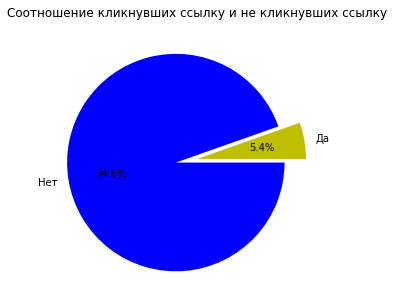

In [10]:
plt.figure(figsize=(5, 5))
values=click['Количество']
name=click['БылКликВнешнийИсточник']
colors=["y","b"]
plt.title("Cоотношение кликнувших ссылку и не кликнувших ссылку")
explode=[0,0.2]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

In [11]:
date_start=min(data['Период'])
date_stop=max(data['Период'])
print(f'Период рассылки от {date_start} до {date_stop}')

Период рассылки от 2022-01-12 11:00:01 до 2023-04-27 20:01:27


Вывод:
- За период рассылки от 2022-01-12 11:00:01 до 2023-04-27 20:01:27 отправлено 216780 писем;
- По 11704 письмам был переход по ссылке, 205076 писем остались без перехода;
- 5,4% получивших рассылку в Telegram переходят по ссылке;

# Анализ по перешедшим по ссылке (кликнули)

In [12]:
data_click=data[data['БылКликВнешнийИсточник']=='Да']
data_top=data_click.groupby(['НаименованиеКонтрагента','НаименованиеКЛК','Должность'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество', ascending=False)
data_top.head(50)
#50 пользователей, которые чаще всего переходили по ссылке 

,НаименованиеКонтрагента,НаименованиеКЛК,Должность,Количество,Время_перехода_день,Время_перехода_минута
2210,"Тера-Линк, ООО",Антонюк Ирина Александровна,Гл. бух.,54,0.425926,742.639506
2294,Управление по конкурентной политике и координа...,Исаева Ирина Алексеевна,Гл. бух.,46,1.173913,2029.202536
763,"ЖИЛКОМСЕРВИСПЛЮС, ООО",Королев Алексей Сергеевич,юрист,45,2.244444,3754.441852
247,"Арк-он, ООО (ранее до 06.06.18 АО, до 22.12.17...",Кудиярова Марина Сергеевна,Гл. бух.,39,3.948718,5915.396581
329,"БУДЬ ЗДОРОВ, ООО",Лаврентьева Лариса Сергеевна,Гл. бух.,38,0.315789,687.947368
2439,"Центр гигиены и эпидемиологии в городе Москве,...",Клаузнер Татьяна Николаевна,нач. отд. кадров,36,40.750000,59348.481019
78,"АЛЬТЭКИ, СК, ООО",Мордвинова Наталья Анатольевна,Гл. бух.,36,0.638889,1527.700926
1803,"РосИнтер Ресторанс, ООО",Волгина Светлана Генриховна,зам. гл. бух.,35,4.257143,7042.437143
1993,"СерВис, ООО",Жардецкая Ирина Геннадьевна,Гл. бух.,35,6.800000,10221.259524
2454,"Центр-Недвижимость, ООО",Учаева Ирина Ивановна,юрист,34,0.647059,1076.822549


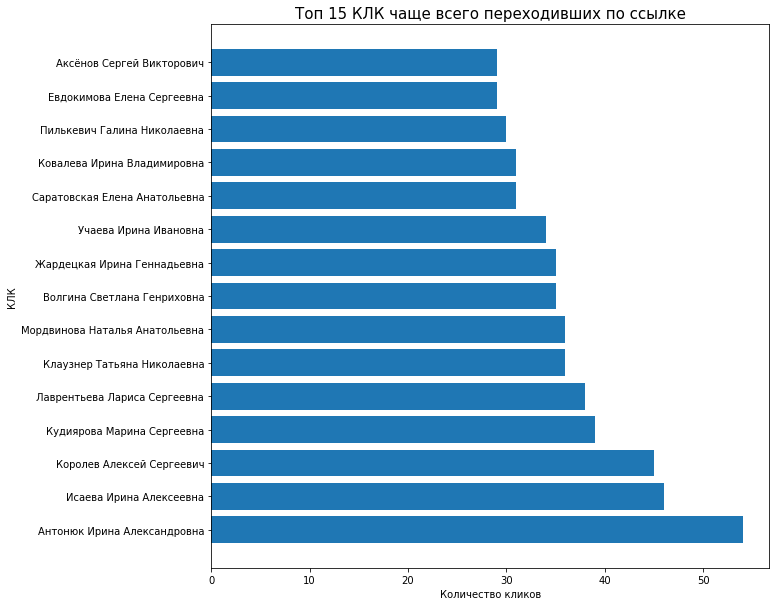

In [13]:
plt.figure(figsize=(10, 10))
plt.barh(data_top['НаименованиеКЛК'].head(15), data_top['Количество'].head(15), label='КЛвК')
plt.xlabel("Количество кликов")
plt.ylabel("КЛК")
plt.title('Топ 15 КЛК чаще всего переходивших по ссылке', fontsize=15)
plt.show()

In [14]:
data_top_mail=data[data['БылКликВнешнийИсточник']=='Да'].groupby(['ВидПисьма'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество_кликов","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество_кликов', ascending=False)
data_top_mail
#Количество по виду писем

,ВидПисьма,Количество_кликов,Время_перехода_день,Время_перехода_минута
0,Аналитика,6167,3.913734,5978.162113
3,Ответы ЛК,2978,5.665883,8547.109044
2,Мероприятия ДИО,2326,5.783319,8724.110254
1,Аналитика ДП,233,8.047210,11982.413877


([<matplotlib.patches.Wedge at 0x2b6e229b280>,
 [Text(-0.09289691607587297, 1.0960703275719093, 'Аналитика'),
  Text(-0.6232252471939174, -0.9064161799416871, 'Ответы ЛК'),
  Text(0.8052851927938854, -0.7493435515615751, 'Мероприятия ДИО'),
  Text(1.2974583614571238, -0.08125146327910347, 'Аналитика ДП')],
 [Text(-0.05067104513229434, 0.5978565423119504, '52.7%'),
  Text(-0.33994104392395486, -0.49440882542273834, '25.4%'),
  Text(0.4392464687966648, -0.4087328463063136, '19.9%'),
  Text(0.7984359147428454, -0.05000090047944829, '2.0%')])

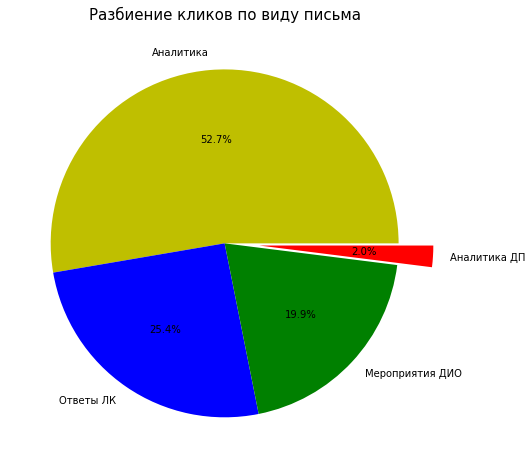

In [19]:
plt.figure(figsize=(8, 8))
values=data_top_mail['Количество_кликов']
name=data_top_mail['ВидПисьма']
colors=["y","b","g","r"]
plt.title("Разбиение кликов по виду письма", fontsize=15)
explode=[0,0,0,0.2]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

Вывод:
- 52.7% кликов приходятся на тему, Аналитика;
- Ответы ЛК и Мероприятия ДИО, каждый около 1/4 кликов составляют;
- Аналитик ДП, является самой не популярной по кликам.

In [20]:
top_mail=set(data_top_mail['ВидПисьма'])
all_mail=set(data['ВидПисьма'].unique())
print('Список Видов писем, по которым вообще нет кликов')
not_click=list(all_mail - top_mail)


Список Видов писем, по которым вообще нет кликов


In [21]:
mail_not=data.groupby(['ВидПисьма'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество писем"})
mail_not=mail_not[mail_not['ВидПисьма'].isin(not_click)]\
.sort_values(by=['Количество писем'], ascending=False)

# mail_not=mail_not[~mail_not['ВидПисьма'].isin(not_click)]\
# .sort_values(by=['Количество писем'], ascending=False)

mail_not

,ВидПисьма,Количество писем
5,Напоминание о необходимости оплатить счёт с кн...,2211
2,Благодарность за оплату счета ДИО,1783
8,Оплатите счет что бы получить подарок с кнопкой,128
6,Напоминание о необходимости подписать акт,105
10,Предложение перейти на ЭДО,41
7,Оплатите счет что бы получить подарок БЕЗ кнопки,3
4,Напоминание о необходимости оплатить счёт БЕЗ ...,1


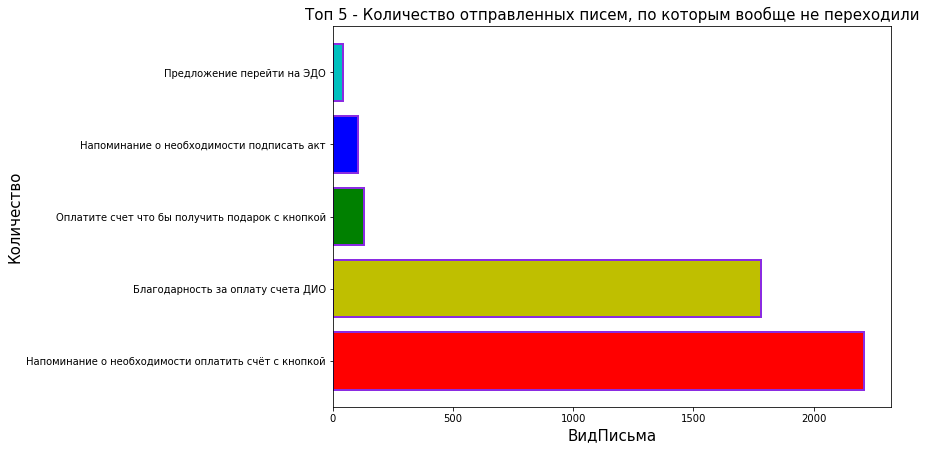

In [22]:
plt.figure(figsize=[10, 7])

plt.barh(mail_not['ВидПисьма'].head(5), mail_not['Количество писем'].head(5), edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive'], linewidth=2)

plt.title('Топ 5 - Количество отправленных писем, по которым вообще не переходили', fontsize=15)
plt.xlabel('ВидПисьма', fontsize=15)
plt.ylabel('Количество', fontsize=15)
# plt.xticks(rotation=90)
plt.show()

In [23]:
data_top_post=data_click.groupby(['Должность'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество', ascending=False)
data_top_post.head(15)
#15 должонстей, которые чаще всего переходят по ссылке

,Должность,Количество,Время_перехода_день,Время_перехода_минута
3,Гл. бух.,4688,4.909343,7448.069721
23,бухгалтер,1509,5.184228,7876.937387
198,юрист,1198,3.469950,5283.798873
90,кадровик,524,6.990458,10384.188073
65,зам. гл. бух.,403,3.627792,5715.096112
40,ген. дир. и гл. бухгалтер,242,4.549587,6899.353857
110,нач. отд. кадров,208,10.937500,16152.337340
6,адвокат,122,3.122951,4767.627869
189,фин. дир.,116,3.982759,6054.611782
2,Ген. дир.,103,5.970874,8887.420388


In [24]:
print('Вывод:')
print(round(4688/11704,2)*100,'% от всех кликов, это должность Гл. бух.')
print(round(1509/11704,2)*100,'% от всех кликов, это должность бухгалтер')
print(round(1198/11704,2)*100,'% от всех кликов, это должность юрист')

Вывод:
40.0 % от всех кликов, это должность Гл. бух.
13.0 % от всех кликов, это должность бухгалтер
10.0 % от всех кликов, это должность юрист


In [25]:
data_top_m_p=data_click[data_click['ВидПисьма']=='Аналитика'].groupby(['ВидПисьма','Должность'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count",'Время_перехода_день':"mean",'Время_перехода_минута':"mean"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество","Время_перехода":"Среднее время перехода днях"}) \
.sort_values(by='Количество', ascending=False)
data_top_m_p.head(10)
#10 должонстей сделавших клики,которые получили письмо на тему Аналитика

,ВидПисьма,Должность,Количество,Время_перехода_день,Время_перехода_минута
3,Аналитика,Гл. бух.,2343,3.895860,5966.100391
20,Аналитика,бухгалтер,804,4.694030,7156.044486
182,Аналитика,юрист,688,2.513081,3876.597989
82,Аналитика,кадровик,280,6.014286,8955.068631
59,Аналитика,зам. гл. бух.,209,2.966507,4721.489394
36,Аналитика,ген. дир. и гл. бухгалтер,137,2.773723,4328.955839
100,Аналитика,нач. отд. кадров,115,6.426087,9605.264203
113,Аналитика,нач. юр. отдела,70,3.714286,5551.872381
5,Аналитика,адвокат,64,1.968750,3056.130729
173,Аналитика,фин. дир.,63,3.936508,5991.675397


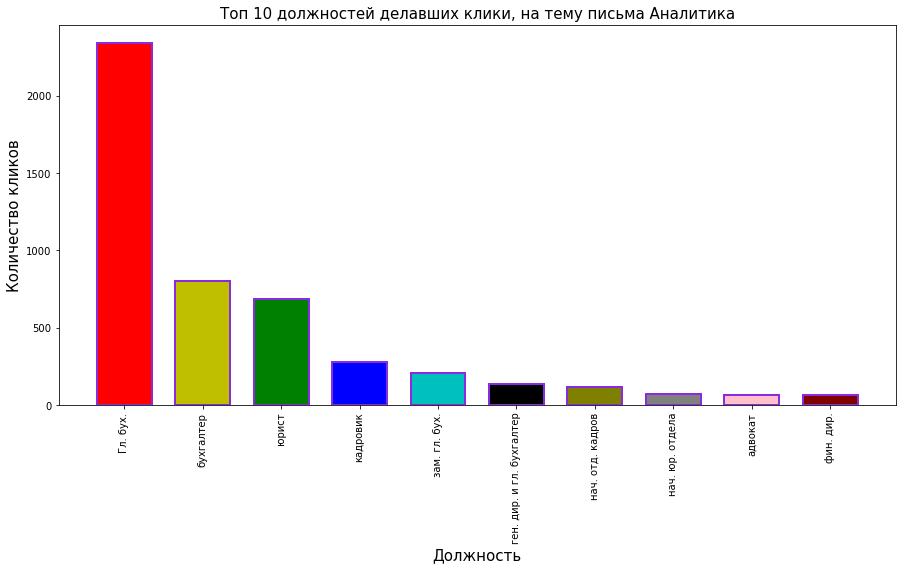

In [26]:
plt.figure(figsize=[15, 7])

plt.bar(data_top_m_p['Должность'].head(10), data_top_m_p['Количество'].head(10), width=0.7, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon'], linewidth=2)

plt.title('Топ 10 должностей делавших клики, на тему письма Аналитика', fontsize=15)
plt.xlabel('Должность', fontsize=15)
plt.ylabel('Количество кликов', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [27]:
data_top_day=data[data['БылКликВнешнийИсточник']=='Да'].groupby(['День_недели_отклика'],as_index=False) \
.aggregate({'БылКликВнешнийИсточник':"count"}) \
.rename(columns={"БылКликВнешнийИсточник":"Количество"}) \
.sort_values(by='Количество', ascending=False)
data_top_day = data_top_day.astype({"День_недели_отклика": "Int64"})
data_top_day

,День_недели_отклика,Количество
2,2,4853
3,3,4141
4,4,1033
0,0,507
1,1,494
5,5,397
6,6,279


In [28]:
print('Вывод')
print(round(4853/11704,2)*100,'% От всех кликов приходятся на среду')
print(round(4141/11704,2)*100,'% От всех кликов приходятся на четверг')

Вывод
41.0 % От всех кликов приходятся на среду
35.0 % От всех кликов приходятся на четверг
